<a href="https://colab.research.google.com/github/badaroz/reconhecimento-padroes/blob/main/problema_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pylab as plt

In [2]:
request = fetch_openml(data_id=560,as_frame=True)
X = request.data
y = request.target

In [3]:
X.shape,y.shape

((252, 14), (252,))

In [4]:
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
mean_squared_error(y, ypred)

1.527203518390806

In [5]:
modelo.intercept_

450.01256934457547

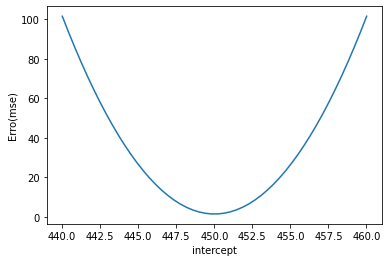

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np
import copy as cp

def find_errors(original_model, delta):

  intercept = original_model.intercept_
  intercepts = np.linspace(intercept-delta, intercept+delta)

  mdl = cp.deepcopy(original_model)
  erros = np.empty(intercepts.shape)

  for j in range(intercepts.shape[0]):
    mdl.intercept_ = intercepts[j]    
    y_pred = mdl.predict(X)
    mse = mean_squared_error(y, y_pred)
    erros[j]=mse

  return intercepts, erros

plt.ylabel("Erro(mse)")
plt.xlabel("intercept")
intercepts ,erros = find_errors(modelo,10)
plt.plot(intercepts,erros)